Create a Deep Learning Model that can predict the trends of the stock price of Google.

In [ ]:
# Recurrent Neural Network

In [9]:
# Part 1 - Data Processing

#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
# Looking at the two previous months

X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Part 2 - Building the RNN

#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\jst27\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [16]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
              
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0489
Epoch 2/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 10/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 2s 2ms/step - lo

1198/1198 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0013


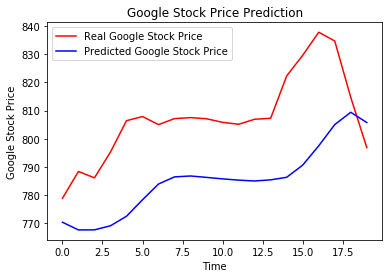

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Code to train model to predict multiple days into the future using LSTMs with multiple features.

C:\Users\jst27\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 943 samples, validate on 236 samples
Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.6625 - val_loss: 0.4240

Epoch 00001: val_loss improved from inf to 0.42397, saving model to weights.h5
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.6005 - val_loss: 0.5090

Epoch 00002: val_loss did not improve from 0.42397
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5880 - val_loss: 0.5129

Epoch 00003: val_loss did not improve from 0.42397
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5857 - val_loss: 0.4680

Epoch 00004: val_loss did not improve from 0.42397
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5852 - val_loss: 0.4558

Epoch 00005: val_loss did not improve from 0.42397
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5833 - val_loss: 0.4231

Epoch 00006: val_loss improved from 0.42397 to 0.42306, sav

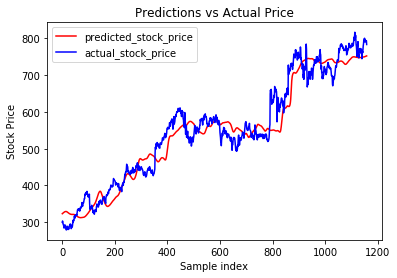

In [18]:
# Part 1 - Data Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
 
# Importing Training Set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
 
cols = list(dataset_train)[1:5]
 
#Preprocess data for training by removing all commas
 
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0,len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(",","")
        
dataset_train = dataset_train.astype(float)

training_set = dataset_train.as_matrix() # Using multiple predictors.
 
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
 
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
 
sc_predict = MinMaxScaler(feature_range=(0,1))
 
sc_predict.fit_transform(training_set[:,0:1])
 
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
 
n_future = 20  # Number of days you want to predict into the future
n_past = 60  # Number of past days you want to use to predict the future
 
for i in range(n_past, len(training_set_scaled) - n_future + 1):
    X_train.append(training_set_scaled[i - n_past:i, 0:5])
    y_train.append(training_set_scaled[i+n_future-1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
 
# Part 2 - Building the RNN
 
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
 
# Initializing the RNN
regressor = Sequential()
 
# Adding fist LSTM layer and Drop out Regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(n_past, 4)))
regressor.add(Dropout(.2))
 
# Part 3 - Adding more layers
 
# Adding 2nd layer with some drop out regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(.2))
 
# Adding 3rd layer with some drop out regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(.2))
 
# Adding 4th layer with some drop out regularization
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(.2))
 
# Output layer
regressor.add(Dense(units=1, activation='sigmoid'))
 
# Compiling the RNN
regressor.compile(optimizer='adam', loss = "binary_crossentropy")  
# Can change loss to mean-squared-error if you require.
 
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs 
#for more info.
 
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, 
                      save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
 
history = regressor.fit(X_train, y_train, shuffle=True, epochs=100,
                        callbacks=[es, rlr,mcp, tb], validation_split=0.2, 
                        verbose=1, batch_size=64)
 
#Predicting on the training set  and plotting the values. the test csv only 
#has 20 values and "ideally" cannot be used since we use 60 timesteps here.
 
predictions = regressor.predict(X_train)
 
#predictions[0] is supposed to predict y_train[19] and so on.
predictions_plot = sc_predict.inverse_transform(predictions[0:-20])
actual_plot = sc_predict.inverse_transform(y_train[19:-1])
 
hfm, = plt.plot(predictions_plot, 'r', label='predicted_stock_price')
hfm2, = plt.plot(actual_plot,'b', label = 'actual_stock_price')
 
plt.legend(handles=[hfm,hfm2])
plt.title('Predictions vs Actual Price')
plt.xlabel('Sample index')
plt.ylabel('Stock Price')
plt.savefig('graph.png', bbox_inches='tight')
plt.show()
plt.close()